In [36]:
############################# USING STUFF
using HDF5
using Plots
using Distributed
pyplot()

Plots.PyPlotBackend()

In [37]:
############################# INPUT STUFF
input_name="225_1"

#filename=""

"225_1"

In [3]:
############################# LOAD SAVE FILES
cd("..")

In [38]:
include("Initial_data/"*input_name*".jl")
file="./data/"*potname*"_R0($R0)_p0($p0).h5"

#filename="K_extended_R0(-10)/p0(15)"
#file="data/"*filename*".h5"

"./data/layered_03_R0(-22.5)_p0(0).h5"

In [46]:
############################# HISTOGRAM STUFF
HISTO_RES=300;
xmin=-23;
xmax=4;

In [46]:
###SO
SOfile="./data/SO_"*potname*"_R0($R0)_p0($p0).h5"
#SOfile="/home/nacho/Desktop/Desktop/HEAVY_DATA/SO_"*potname*"_R0($R0)_p0($p0).h5"


include("split_operator_functions_parallel.jl")
T_SO,X_SO,P_SO,PSI_AD_SO,PX_SO=SO_read(SOfile);           #LOAD SPLIT OPERATOR
Y,PX0=SO_histo_builder(X_SO,PX_SO[1],HISTO_RES,xmin,xmax);
Y,PXf=SO_histo_builder(X_SO,PX_SO[end],HISTO_RES,xmin,xmax);
PXf=PXf./maximum(PX0)
PX0=PX0./maximum(PX0);
###

In [41]:
push!(DYN_LIST,"SHEEP")

3-element Array{String,1}:
 "CMFSH"
 "FSSH" 
 "SHEEP"

In [42]:
#E0=h5read(file,"E0");                                     #LOAD INITIAL ENERGY

for dyn in DYN_LIST
    println("Loading $dyn...")
    if dyn in CL_LIST
        str="""T_$(dyn),R_$(dyn),P_$(dyn)=CL_read("$file","$dyn")"""
    elseif dyn in MF_LIST
        str="""T_$(dyn),R_$(dyn),P_$(dyn),C_$(dyn)=MF_read("$file","$dyn")"""
    elseif dyn in SH_LIST
        str="""T_$(dyn),R_$dyn,P_$(dyn),C_$(dyn),AST_$(dyn)=SH_read("$file","$dyn")"""
    else
        str="""T_$(dyn),R_$dyn,P_$(dyn),C_$(dyn),AST_$(dyn)=SH_read("$file","$dyn")"""
    end
    eval(Meta.parse(str))
end

Loading CMFSH...
Loading FSSH...
Loading SHEEP...


In [47]:
for dyn in DYN_LIST
    str="Rbase_$dyn,HR_$dyn=super_histo(R_$dyn[:,1,:],$xmin,$xmax,$HISTO_RES)"
    eval(Meta.parse(str))
    str="HR_$dyn=HR_$dyn./maximum(HR_$dyn[:,1])"
    eval(Meta.parse(str))
end
println("Done!")

Done!


In [44]:
using Plots.PlotMeasures
GUIDEFONT=font(24,"Helvetica")
TICKFONT=font(24,"Helvetica")
L_MARG=[20mm 0mm]
B_MARG=[15mm 0mm]
SIZE=[1000,700]

2-element Array{Int64,1}:
 1000
  700

In [10]:
for dyn in DYN_LIST
    r_string="rm_$(dyn)=zeros(101); for i in 1:101 rm_$(dyn)[i]=mean(R_$(dyn)[i,1,:]); end"
    eval(Meta.parse(r_string))
end

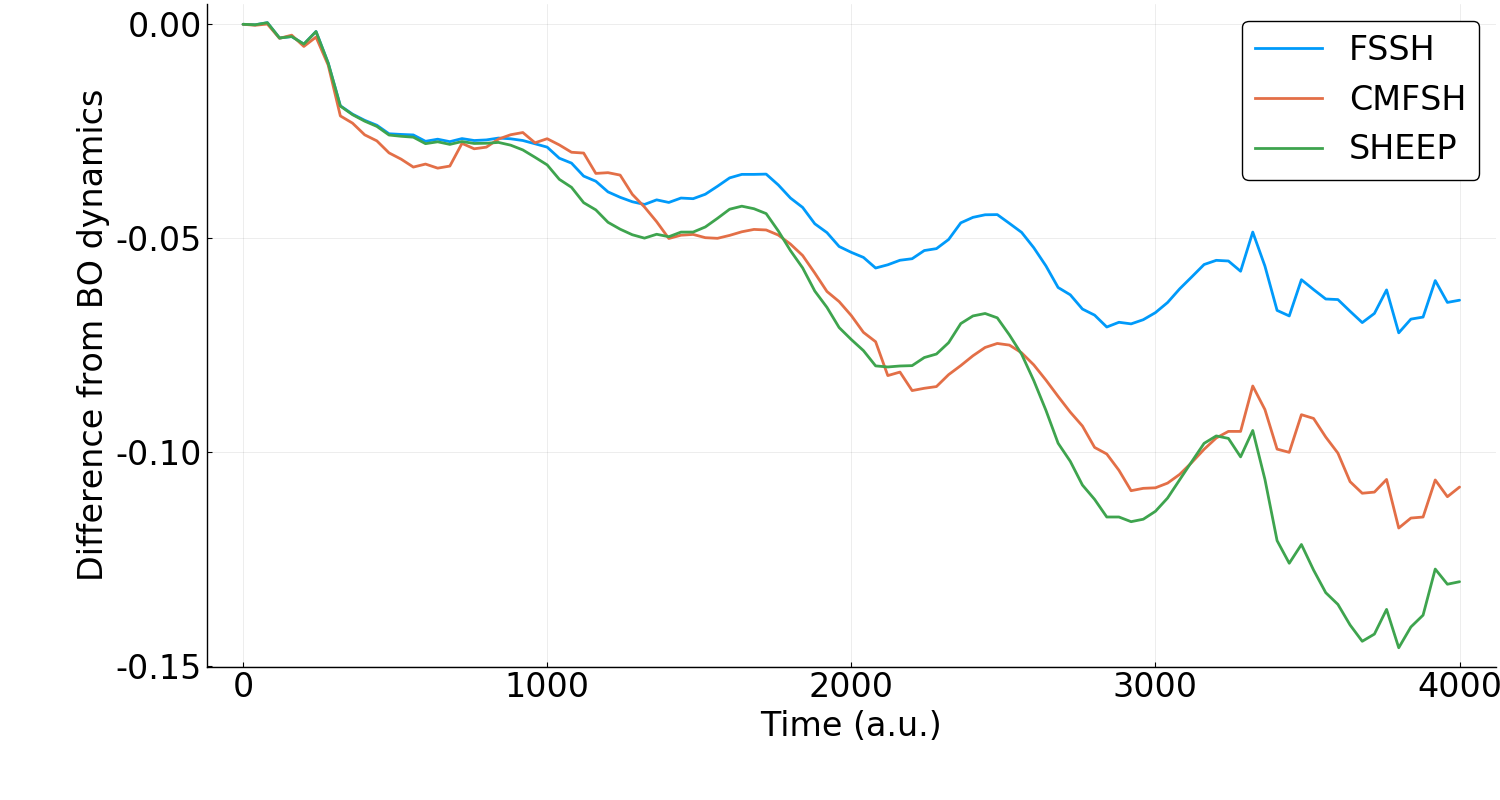

In [18]:
plot(left_margin=L_MARG,bottom_margin=B_MARG,size=SIZE)
plot!(T_FSSH,rm_FSSH-R_BO,label="FSSH",line=2)
plot!(T_CM2_FSSH_FRIC,rm_CM2_FSSH_FRIC-R_BO,label="CMFSH",line=2)
plot!(T_SHEEP,rm_SHEEP-R_BO,label="SHEEP",line=2)
plot!(xlabel="Time (a.u.)",ylabel="Difference from BO dynamics");
plot!(xguidefont = GUIDEFONT,xtickfont=TICKFONT,yguidefont = GUIDEFONT,ytickfont=TICKFONT,legendfont = GUIDEFONT,legend=:best)

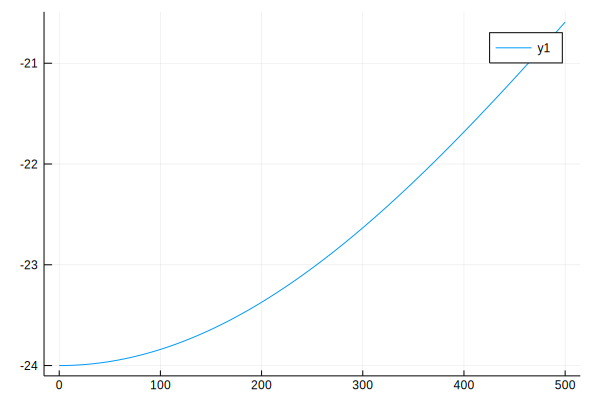

In [27]:
plot(T_EH,R_EH)

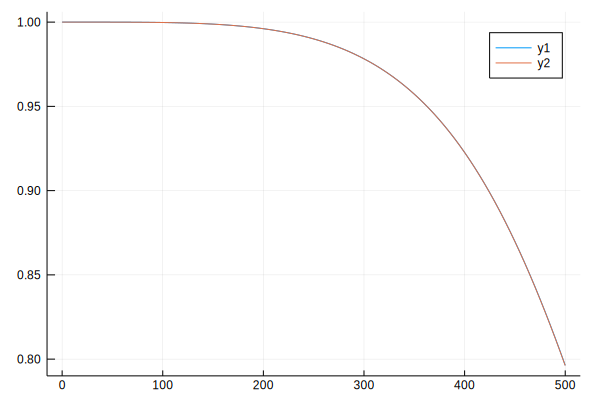

In [36]:
st=1
traj=1
plot(T_EH,abs2.(C_EH[:,st]))
plot!(T_FSSH,abs2.(C_FSSH[:,st,traj]))
#plot!(xlims=[700,2500])

In [ ]:
N_AST=[sum(AST_CM2_FSSH[k,:])-120 for k in 1:101];

In [ ]:
CCM2_avg=[sum(abs2.(C_CM2_FSSH[k,2,:]))./120 for k in 1:101];

In [ ]:
plot(N_AST./120)
plot!(CCM2_avg)

In [ ]:
@manipulate for traj in 1:120
    plot(T_CM3_FSSH,abs2.(C_CM3_FSSH[:,1,traj]))
    plot!(T_CM3_FSSH,abs2.(C_CM3_FSSH[:,2,traj]))
    plot!(T_CM3_FSSH,abs2.(C_CM3_FSSH[:,3,traj]))
end

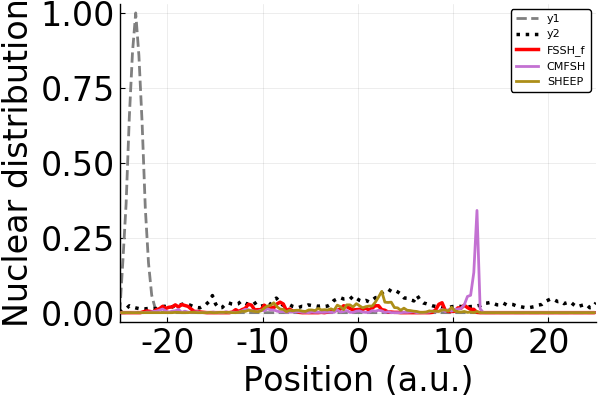

In [53]:
############### HISTOGRAM PLOTTING: WITH SO
GUIDEFONT=font(24,"Helvetica");
TICKFONT=font(24,"Helvetica");
P=plot(Y,PX0,line=(2.0,:dash),color=:grey);
plot!(Y,PXf,line=(2.5,:dot),color=:black);
#P=plot(R_eh[:,1],HR_eh[:,1],label="EH_i",line=(1,:dash),color=:black);
#plot!(Rbase_EH[:,end],-HR_EH[:,end],label="EH_f",line=(2,:solid),color=:blue);
plot!(Rbase_FSSH[:,end],HR_FSSH[:,end],label="FSSH_f",line=(2.5,:solid),color=:red);
#plot!(Rbase_FSSH_dia[:,end],HR_FSSH_dia[:,end],label="FSSH_d_f",line=(1.5,:solid),color=:green);
#plot!(Rbase_CM2[:,end],HR_CM2[:,end],label="CM2",line=(2,:solid))
#plot!(Rbase_CM3[:,end],HR_CM3[:,end],label="CM3",line=(2,:solid))
plot!(Rbase_CM2_FSSH_FRIC[:,end],HR_CM2_FSSH_FRIC[:,end],label="CMFSH",line=(2,:solid))
#plot!(Rbase_CMFSH[:,end],HR_CMFSH[:,end],label="CMFSH",line=(2,:solid))
plot!(Rbase_SHEEP[:,end],HR_SHEEP[:,end],label="SHEEP",line=(2,:solid))
plot!(xlabel="Position (a.u.)",ylabel="Nuclear distribution",xlims=(xmin,xmax));
plot!(xguidefont = GUIDEFONT,xtickfont=TICKFONT,yguidefont = GUIDEFONT,ytickfont=TICKFONT);
#plot!(legend=false);
#ylims!(-0.25,0.25)

P


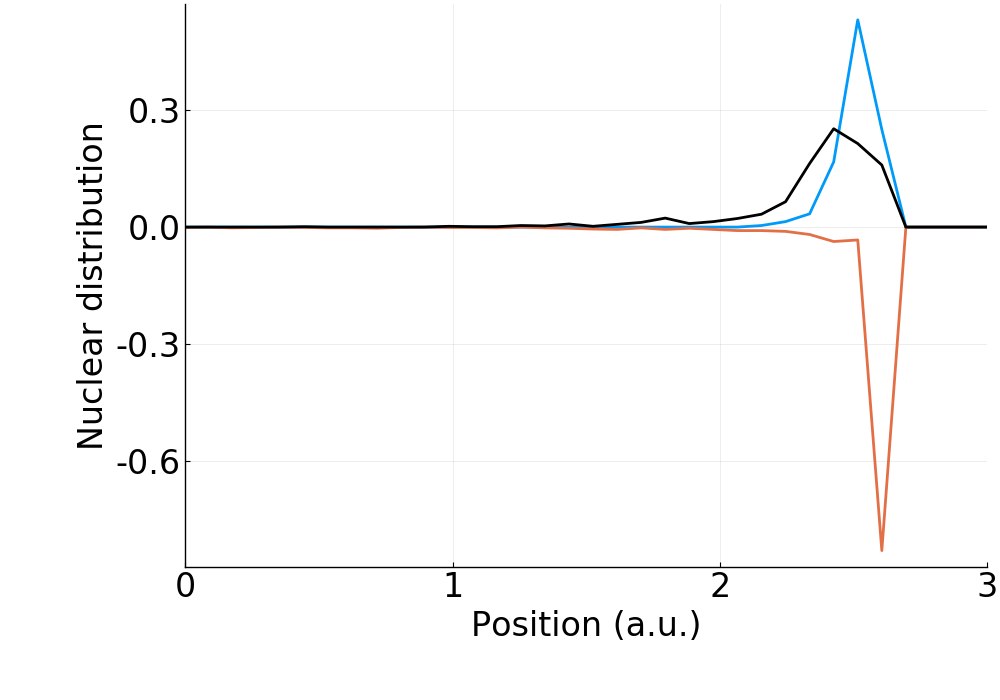

In [50]:
############### HISTOGRAM PLOTTING: WITHOUT SO
GUIDEFONT=font(24,"Helvetica");
TICKFONT=font(24,"Helvetica");
#P=plot(Rbase_EH[:,1],HR_EH[:,1],label="EH_i",line=(1,:dash),color=:black);
#plot!(Rbase_EH[:,end],-HR_EH[:,end],label="EH_f",line=(2,:solid),color=:blue);
P=plot(Rbase_FSSH[:,end],HR_FSSH[:,end],label="FSSH",line=(2,:solid));
#plot!(Rbase_FSSH_dia[:,end],HR_FSSH_dia[:,end],label="FSSH_d_f",line=(1.5,:solid),color=:green);
#plot!(Rbase_CM2[:,end],-HR_CM2[:,end],label="CM2",line=(2,:solid))
#plot!(Rbase_CM3[:,end],HR_CM3[:,end],label="CM3",line=(2,:solid))
plot!(Rbase_CMFSH[:,end],-HR_CMFSH[:,end],label="CMFSH",line=(2,:solid))
plot!(Rbase_SHEEP[:,end],HR_SHEEP[:,end],label="SHEEP",line=(2,:solid),color=:black)
plot!(xlabel="Position (a.u.)",ylabel="Nuclear distribution",xlims=(xmin,xmax));
plot!(xguidefont = GUIDEFONT,xtickfont=TICKFONT,yguidefont = GUIDEFONT,ytickfont=TICKFONT,legendfont=GUIDEFONT);
L_MARG=[20mm 0mm]
B_MARG=[15mm 0mm]
SIZE=[1000,700]
plot!(left_margin=L_MARG,bottom_margin=B_MARG,size=SIZE)
plot!(legend=false);
#ylims!(-0.25,0.25)
xlims!(0,3)
P
